<a href="https://colab.research.google.com/github/athens-21/DE242/blob/main/De242_2_2024_Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Name:**Rattanin kliangmol


**Date:**25/2/2025




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
>>> import os
>>> import numpy as np
>>> import pandas as pd
>>> import statsmodels.formula.api as smf
>>> import matplotlib.pyplot as plt
>>> %matplotlib inline


In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks')
os.getcwd()


'/content/drive/My Drive/Colab Notebooks'

In [ ]:
>>> df= pd.read_excel('/content/drive/My Drive/Colab Notebooks/dataset/Home Market Value.xlsx', sheet_name='Data', skiprows=2)


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
>>> df.columns
>>> X = df['Square Feet']
>>> y = df['Market Value']

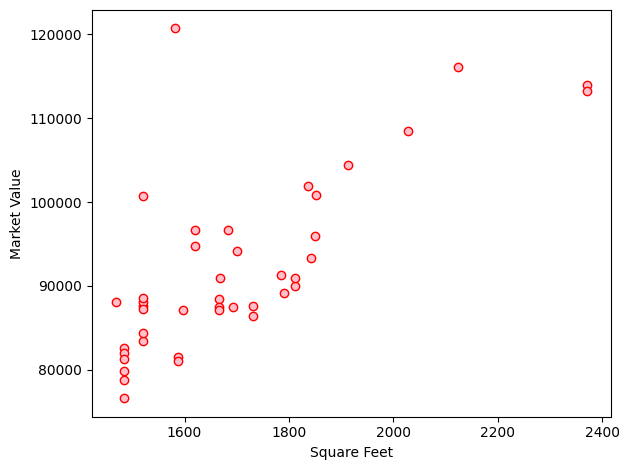

In [ ]:
>>> plt.scatter(X, y, facecolor='pink', edgecolor='red', marker='o')
>>> plt.xlabel('Square Feet')
>>> plt.ylabel('Market Value')
>>> plt.tight_layout()
>>> plt.savefig('myscatter-plot.jpg')

In [ ]:
df.columns = ['HouseAge', 'SquareFeet', 'MarketValue']

In [ ]:
>>> model = smf.ols(formula='MarketValue~SquareFeet', data=df).fit()
>>> model.params


,0
Intercept,32673.219897
SquareFeet,35.036373


In [ ]:
>>> #predict() without a parameter will predict all data point.
>>> predicted_Y= model.predict()


In [ ]:
>>> model.predict(exog=dict(SquareFeet=225))

,0
0,40556.403729


In [ ]:
>>> X.corr(y, method='pearson')



0.7312552233485191

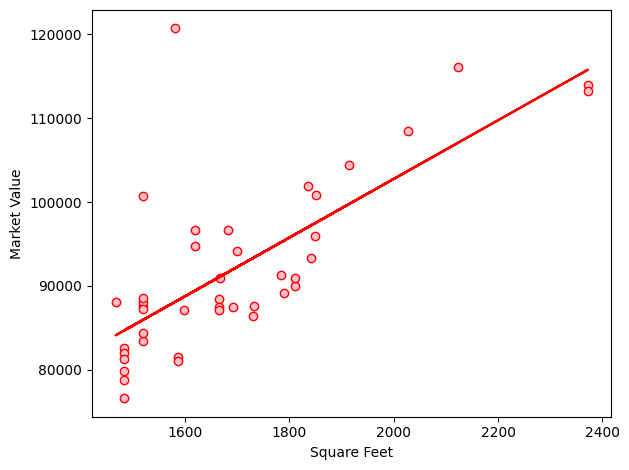

In [ ]:
>>> plt.scatter(X, y, facecolor='pink', edgecolor='red', marker='o')
>>> plt.xlabel('Square Feet')
>>> plt.ylabel('Market Value')
>>> plt.plot(X, predicted_Y, color='red')
>>> plt.tight_layout()
>>> plt.savefig('simple_regression_line.jpg')
>>> plt.plot(X, predicted_Y, color='red')
>>> plt.tight_layout()
>>> plt.savefig('simple_regression_line.jpg')

In [ ]:
>>> model.rsquared

0.5347342016744923

In [ ]:
>>> model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MarketValue   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     45.97
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           3.80e-08
Time:                        09:09:25   Log-Likelihood:                -432.12
No. Observations:                  42   AIC:                             868.2
Df Residuals:                      40   BIC:                             871.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.267e+04   8831.951      3.699      0.001    1.48e+04    5.05e+04
SquareFeet    35.0364      5.167      6.780      0.000      24.593      45.480
==============================================================================
Omnibus:                       42.087   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.922
Skew:                           2.430   Prob(JB):                     6.91e-36
Kurtosis:                      11.301   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df= pd.read_excel('/content/drive/My Drive/Colab Notebooks/dataset/Colleges and Universities.xlsx', sheet_name='Data',
skiprows=2)

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
>>> df.columns
>>> X = df[['Median SAT', 'Acceptance Rate', 'Expenditures/Student',
'Top 10% HS']]
>>> y = df['Graduation %']

In [ ]:
# Import the linear_model module from sklearn
from sklearn import linear_model

# Create a linear regression model
lm = linear_model.LinearRegression()




In [ ]:
>>> lm = linear_model.LinearRegression()
>>> model = lm.fit(X, y)

In [ ]:
>>> model.coef_
>>> model.intercept_


17.92095587064935

In [ ]:
>>> predicted_Y = model.predict(X)

In [ ]:
>>> model.score(X, y)

0.534426040648133

In [ ]:
>>> df.corr(method='pearson', numeric_only=True)

,Median SAT,Acceptance Rate,Expenditures/Student,Top 10% HS,Graduation %
Median SAT,1.000000,-0.601902,0.572742,0.503468,0.564147
Acceptance Rate,-0.601902,1.000000,-0.284254,-0.609721,-0.550378
Expenditures/Student,0.572742,-0.284254,1.000000,0.505782,0.042504
Top 10% HS,0.503468,-0.609721,0.505782,1.000000,0.138613
Graduation %,0.564147,-0.550378,0.042504,0.138613,1.000000


In [ ]:
>>> residual = predicted_Y - y

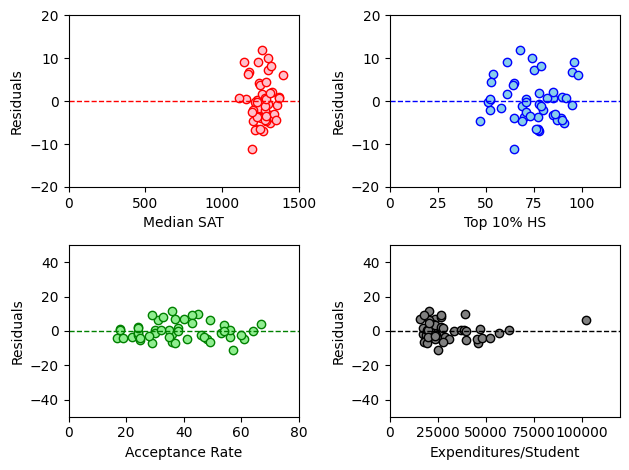

In [ ]:
>>> fig, axes = plt.subplots(2, 2)
axes[0, 0].scatter(df['Median SAT'], residual, facecolor='pink', edgecolor='red')
axes[0, 0].set_xlabel('Median SAT')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_xlim(0, 1500)
axes[0, 0].set_ylim(-20, 20)
axes[0, 0].plot([0, 1500], [0, 0], color='red', linestyle='--', linewidth=1)
axes[0, 1].scatter(df['Top 10% HS'], residual, facecolor='skyblue', edgecolor='blue')
axes[0, 1].set_xlabel('Top 10% HS')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_xlim(0, 120)
axes[0, 1].set_ylim(-20, 20)
axes[0, 1].plot([0, 120], [0, 0], color='blue', linestyle='--', linewidth=1)
axes[1, 0].scatter(df['Acceptance Rate']*100, residual, facecolor='lightgreen', edgecolor='green')
axes[1, 0].set_xlabel('Acceptance Rate')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_xlim(0, 80)
axes[1, 0].set_ylim(-50, 50)
axes[1, 0].plot([0, 80], [0, 0], color='green', linestyle='--', linewidth=1)
axes[1, 1].scatter(df['Expenditures/Student'], residual, facecolor='gray', edgecolor='black')
axes[1, 1].set_xlabel('Expenditures/Student')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_xlim(0, 120000)
axes[1, 1].set_ylim(-50, 50)
axes[1, 1].plot([0, 120000], [0, 0], color='black', linestyle='--', linewidth=1)
fig.tight_layout()
fig.savefig('residual_plot.jpg')

In [ ]:
>>> df= pd.read_excel('/content/drive/My Drive/Colab Notebooks/dataset/Banking Data.xlsx', sheet_name='Data', skiprows=3)

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
>>> df.columns

Index(['Age', 'Education', 'Income', 'Home Value', 'Wealth', 'Balance'], dtype='object')

In [ ]:
>>> df.columns = ['Age', 'Education', 'Income', 'HomeValue', 'Wealth','Balance']

In [ ]:
>>> model = smf.ols(formula='Balance~Age+Education+Income+HomeValue+Wealth',
data=df).fit()

In [ ]:
>>> model.params

,0
Intercept,-10710.642783
Age,318.664963
Education,621.860347
Income,0.146323
HomeValue,0.009183
Wealth,0.074332


In [ ]:
>>> model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     342.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           1.52e-59
Time:                        09:09:26   Log-Likelihood:                -919.73
No. Observations:                 102   AIC:                             1851.
Df Residuals:                      96   BIC:                             1867.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.071e+04   4260.976     -2.514      0.014   -1.92e+04   -2252.672
Age          318.6650     60.986      5.225      0.000     197.608     439.721
Education    621.8603    318.960      1.950      0.054     -11.269    1254.990
Income         0.1463      0.041      3.588      0.001       0.065       0.227
HomeValue      0.0092      0.011      0.832      0.408      -0.013       0.031
Wealth         0.0743      0.011      6.643      0.000       0.052       0.097
==============================================================================
Omnibus:                       16.445   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.771
Skew:                           0.605   Prob(JB):                     7.65e-08
Kurtosis:                       5.500   Cond. No.                     3.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
>>> #X = df[['Age', 'Education', 'Income', 'Wealth']]
>>> model = smf.ols(formula='Balance~Age+Education+Income+Wealth', data=df).fit()
>>> model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     429.2
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           9.69e-61
Time:                        09:09:26   Log-Likelihood:                -920.10
No. Observations:                 102   AIC:                             1850.
Df Residuals:                      97   BIC:                             1863.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.243e+04   3718.674     -3.343      0.001   -1.98e+04   -5051.918
Age          325.0653     60.403      5.382      0.000     205.182     444.948
Education    773.3800    261.433      2.958      0.004     254.508    1292.252
Income         0.1597      0.037      4.272      0.000       0.086       0.234
Wealth         0.0730      0.011      6.603      0.000       0.051       0.095
==============================================================================
Omnibus:                       15.481   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.777
Skew:                           0.626   Prob(JB):                     1.53e-06
Kurtosis:                       5.176   Cond. No.                     2.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
>>> model.rsquared_adj

0.9443205469112058

In [ ]:
>>> mydf= df[['Age', 'Education', 'Income', 'HomeValue', 'Wealth']]
>>> mydf.corr()

,Age,Education,Income,HomeValue,Wealth
Age,1.000000,0.173407,0.477147,0.386493,0.468092
Education,0.173407,1.000000,0.575394,0.753521,0.469413
Income,0.477147,0.575394,1.000000,0.795355,0.946665
HomeValue,0.386493,0.753521,0.795355,1.000000,0.698478
Wealth,0.468092,0.469413,0.946665,0.698478,1.000000


In [ ]:
>>> #X1 = df[['Age', 'Education', 'Income']]
>>> #y = df['Balance']
>>> model1 = smf.ols(formula='Balance~Age+Education+Income', data=df).fit()
>>> model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     388.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           2.89e-54
Time:                        09:09:27   Log-Likelihood:                -939.03
No. Observations:                 102   AIC:                             1886.
Df Residuals:                      98   BIC:                             1897.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9539.9454   4423.059     -2.157      0.033   -1.83e+04    -762.528
Age          332.5001     72.335      4.597      0.000     188.953     476.047
Education    288.6555    300.534      0.960      0.339    -307.744     885.055
Income         0.3871      0.017     22.137      0.000       0.352       0.422
==============================================================================
Omnibus:                       13.306   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.552
Skew:                           0.557   Prob(JB):                     2.09e-05
Kurtosis:                       4.957   Cond. No.                     9.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
>>> #X2 = df[['Age', 'Education', 'Wealth']]
>>> #y = df['Balance']
>>> model2 = smf.ols(formula='Balance~Age+Education+Wealth', data=df).fit()
>>> model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     481.5
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           1.72e-58
Time:                        09:09:27   Log-Likelihood:                -928.89
No. Observations:                 102   AIC:                             1866.
Df Residuals:                      98   BIC:                             1876.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.773e+04   3801.663     -4.664      0.000   -2.53e+04   -1.02e+04
Age          367.8214     64.598      5.694      0.000     239.628     496.015
Education   1300.3087    249.973      5.202      0.000     804.245    1796.372
Wealth         0.1165      0.005     24.887      0.000       0.107       0.126
==============================================================================
Omnibus:                       11.165   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               31.474
Skew:                           0.001   Prob(JB):                     1.46e-07
Kurtosis:                       5.721   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
>>> import pandas as pd
>>> import numpy as np
>>> import matplotlib.pyplot as plt
>>> import seaborn as sns
>>> from statsmodels.stats.outliers_influence import variance_inflation_factor
>>> from statsmodels.tools.tools import add_constant


In [ ]:
>>> df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/dataset/Banking Data.xlsx', skiprows=3)
>>> df.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Age,Education,Income,Home Value,Wealth,Balance
0,35.9,14.8,91033,183104,220741,38517
1,37.7,13.8,86748,163843,223152,40618
2,36.8,13.8,72245,142732,176926,35206
3,35.3,13.2,70639,145024,166260,33434
4,35.3,13.2,64879,135951,148868,28162


In [ ]:
>>> X = df[['Age', 'Education', 'Income', 'Home Value', 'Wealth']]
>>> X.head()


,Age,Education,Income,Home Value,Wealth
0,35.9,14.8,91033,183104,220741
1,37.7,13.8,86748,163843,223152
2,36.8,13.8,72245,142732,176926
3,35.3,13.2,70639,145024,166260
4,35.3,13.2,64879,135951,148868


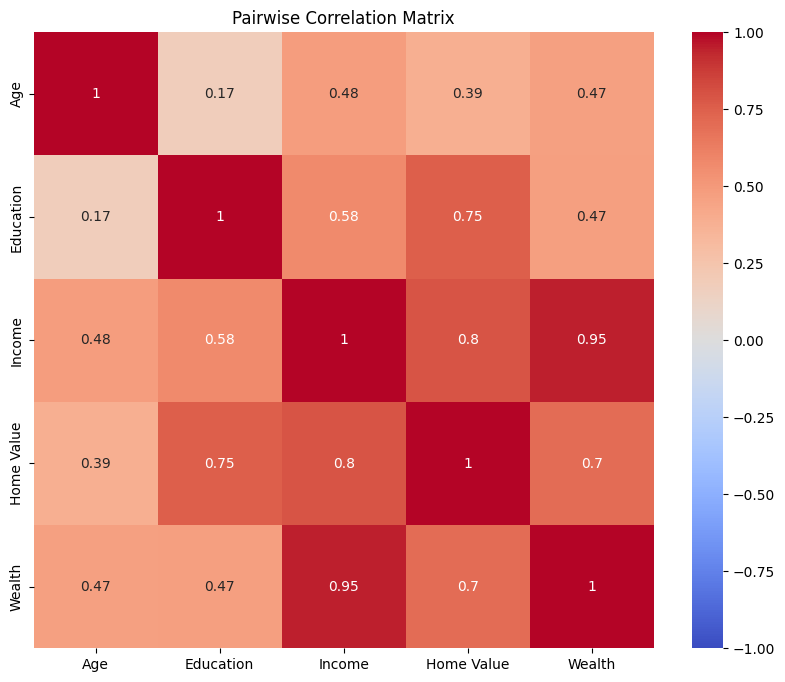

In [ ]:
>>> # Compute the pairwise correlation matrix
>>> corr_matrix = X.corr()
>>> # Visualize the correlation matrix
>>> plt.figure(figsize=(10, 8))
>>> sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
>>> plt.title('Pairwise Correlation Matrix')
>>> plt.show()

In [ ]:
>>> # Add a constant to the model (intercept)
>>> X = add_constant(X)
>>> # Calculate VIF for each feature
>>> vif_data = pd.DataFrame()
>>> vif_data['Feature'] = X.columns
>>> vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
>>> print(vif_data)

      Feature         VIF
0       const  438.250968
1         Age    1.342764
2   Education    2.456706
3      Income   14.901724
4  Home Value    4.382999
5      Wealth   10.714276


In [ ]:
>>> df= pd.read_excel('/content/drive/My Drive/Colab Notebooks/dataset/Employee Salaries.xlsx', sheet_name='Data', skiprows=2)
>>> df.columns

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Index(['Employee', 'Salary', 'Age', 'MBA'], dtype='object')

In [ ]:
>>> #df['MBA'] = df.loc[:, 'MBA'].replace(['Yes', 'No'], [1, 0])
>>> replace_dict = {'Yes': '1', 'No': '0'}
>>> df['MBA'] = df.loc[:, 'MBA'].replace(replace_dict).astype(int)

In [ ]:
>>> model = smf.ols(formula='Salary~Age+MBA', data=df).fit()
>>> model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     323.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           6.05e-22
Time:                        09:09:27   Log-Likelihood:                -327.63
No. Observations:                  35   AIC:                             661.3
Df Residuals:                      32   BIC:                             665.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    893.5876   1824.575      0.490      0.628   -2822.951    4610.126
Age         1044.1460     42.141     24.777      0.000     958.307    1129.985
MBA         1.477e+04   1351.802     10.924      0.000     1.2e+04    1.75e+04
==============================================================================
Omnibus:                       10.524   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.598
Skew:                           0.859   Prob(JB):                      0.00303
Kurtosis:                       5.236   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
>>> df= pd.read_excel('/content/drive/My Drive/Colab Notebooks/dataset/Surface Finish.xlsx', sheet_name='Data', skiprows=2)
>>> df.columns


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Index(['Part', 'Surface Finish', 'RPM', 'Cutting Tool'], dtype='object')

In [ ]:
>>> df.dtypes


,0
Part,int64
Surface Finish,float64
RPM,int64
Cutting Tool,object


In [ ]:
df['Cutting Tool'].value_counts()

,count
Cutting Tool,
A,10
B,10
C,10
D,5


In [ ]:

>>> df['B'] = np.where(df['Cutting Tool']=='B', 1, 0)
>>> df['C'] = np.where(df['Cutting Tool']=='C', 1, 0)
>>> df['D'] = np.where(df['Cutting Tool']=='D', 1, 0)
>>> df.columns

Index(['Part', 'Surface Finish', 'RPM', 'Cutting Tool', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.head()

,Part,Surface Finish,RPM,Cutting Tool,B,C,D
0,1,45.44,225,A,0,0,0
1,2,42.03,200,A,0,0,0
2,3,50.10,250,A,0,0,0
3,4,48.75,245,A,0,0,0
4,5,47.92,235,A,0,0,0


In [ ]:
df.column = ['Part', 'SurfaceFinish','RPM','CuttingTool', 'B', 'C', 'D']
df.columns

Index(['Part', 'Surface Finish', 'RPM', 'Cutting Tool', 'B', 'C', 'D'], dtype='object')

In [ ]:
>>> df= pd.read_excel('/content/drive/My Drive/Colab Notebooks/dataset/Surface Finish.xlsx', sheet_name='Data', skiprows=2)
>>> print(df.columns) #check columns
>>> df.dtypes

df['Cutting Tool'].value_counts()


>>> df['B'] = np.where(df['Cutting Tool']=='B', 1, 0)
>>> df['C'] = np.where(df['Cutting Tool']=='C', 1, 0)
>>> df['D'] = np.where(df['Cutting Tool']=='D', 1, 0)
>>> print(df.columns) # check columns after dummy variable creation
df.head()
df.columns = ['Part', 'SurfaceFinish','RPM','CuttingTool', 'B', 'C', 'D'] # corrected line
>>> print(df.columns) # check columns after reassignment of names
model = smf.ols(formula='SurfaceFinish~RPM+B+C+D', data=df).fit()
model.params

Index(['Part', 'Surface Finish', 'RPM', 'Cutting Tool'], dtype='object')
Index(['Part', 'Surface Finish', 'RPM', 'Cutting Tool', 'B', 'C', 'D'], dtype='object')
Index(['Part', 'SurfaceFinish', 'RPM', 'CuttingTool', 'B', 'C', 'D'], dtype='object')


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,0
Intercept,24.494372
RPM,0.097761
B,-13.310568
C,-20.487000
D,-26.036745
